# Modèle de nombre de cotisants en fonction du taux de chômage par interpolation

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
from retraites.FonctionPension import FonctionPension
import openturns as ot
import pylab as pl
import numpy as np

## Nombre de cotisants

Les graphiques suivant montrent les trajectoires du nombre de cotisants et des autres dépenses de retraites. 

In [2]:
simulateur = SimulateurRetraites()

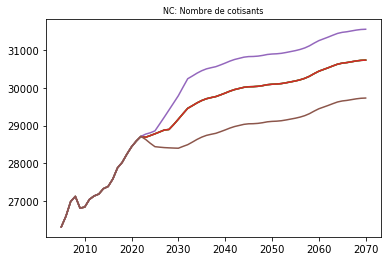

In [3]:
simulateur.graphique("NC")

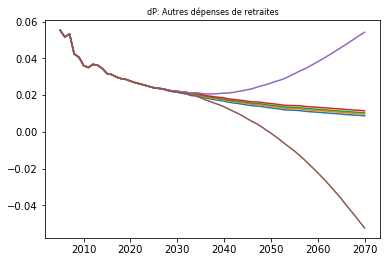

In [4]:
simulateur.graphique("dP")

## Modèle par interpolation

Le COR détermine le nombre de cotisants $N_C$ par année en fonction du taux de chômage $\tau_c$. Il considère un scénario optimiste ($\tau_c = 4.5\%$), un scénario central ($\tau_c = 7\%$) et un scénario pessimiste ($\tau_c = 10\%$). Construisons des scénarios intermédiaires par interpolation. 

Dans les graphiques qui suivent, on montre que le modèle permet de simuler des trajectoires de nombres de cotisants pour des taux de chômage qui n'étaient initialement dans les scénarios du COR.

In [5]:
def calculeNCetDP(TauC, annee, simulateur):
    """
    Génère une trajectoire de nombre de cotisants et 
    des autres dépenses de retraites en fonction du taux 
    de chômage. 
    """
    modele = FonctionPension(simulateur, annee)
    NC = modele.interpolateur_NC(TauC)
    dP = modele.interpolateur_dP(TauC)
    return [NC, dP]

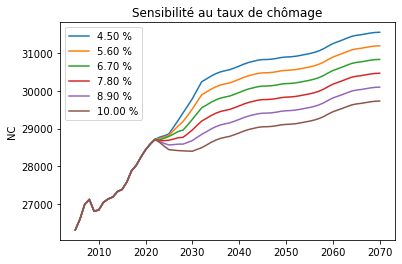

In [6]:
pl.title("Sensibilité au taux de chômage")
pl.ylabel("NC");
for TauC in np.linspace(4.5, 10.0, 6):    
    y = [calculeNCetDP(TauC, a, simulateur)[0] for a in simulateur.annees]
    pl.plot(simulateur.annees, y, label = "%.2f %%" % (TauC))
pl.legend();

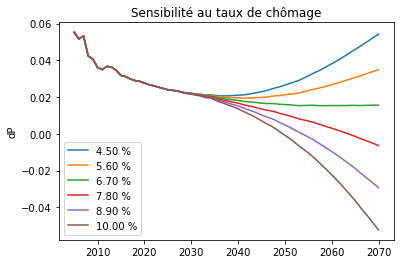

In [7]:
pl.title("Sensibilité au taux de chômage")
pl.ylabel("dP");
for TauC in np.linspace(4.5, 10.0, 6):
    y = [calculeNCetDP(TauC, a, simulateur)[1] for a in simulateur.annees]
    pl.plot(simulateur.annees, y, label = "%.2f %%" % (TauC))
pl.legend();

Dans les graphiques qui suivent, on compare la trajectoire simulée par le calcul de la classe `FonctionPension` aux trajectoires du COR. 

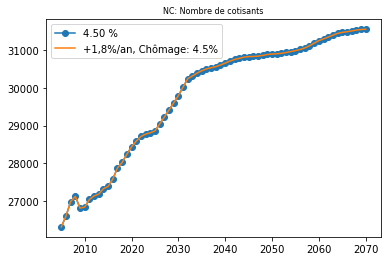

In [8]:
TauC = 4.5
y = [calculeNCetDP(TauC, a, simulateur)[0] for a in simulateur.annees]
pl.plot(simulateur.annees, y, "o-", label = "%.2f %%" % (TauC))
simulateur.setLabelLongs(False)
simulateur.graphique("NC", scenarios_indices=[5])
pl.legend();

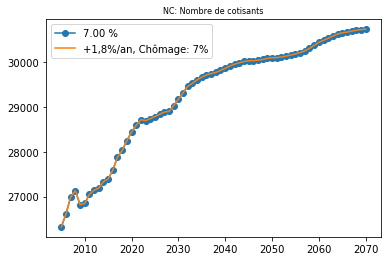

In [9]:
TauC = 7.0
y = [calculeNCetDP(TauC, a, simulateur)[0] for a in simulateur.annees]
pl.plot(simulateur.annees, y, "o-", label = "%.2f %%" % (TauC))
simulateur.setLabelLongs(False)
simulateur.graphique("NC", scenarios_indices=[1])
pl.legend();

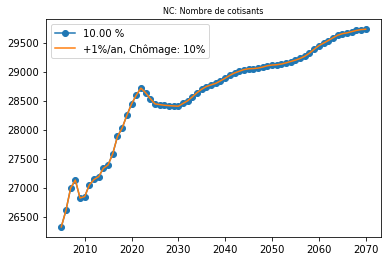

In [10]:
TauC = 10.0
y = [calculeNCetDP(TauC, a, simulateur)[0] for a in simulateur.annees]
pl.plot(simulateur.annees, y, "o-", label = "%.2f %%" % (TauC))
simulateur.setLabelLongs(False)
simulateur.graphique("NC", scenarios_indices=[6])
pl.legend();